In [3]:
import pylab as plt
import numpy as np
from numpy import loadtxt, genfromtxt, shape, mean, sort, savetxt, size, array, copy
from pylab import figure
from matplotlib.pyplot import plot, savefig, xlabel, ylabel, scatter, axis, xlim, fill_between, legend, text, show
from sklearn.decomposition.pca import PCA
import pylab as plt
import numpy as np
import sys
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model


# path to mask identifying spectra at max
path_mask = 'mask.dat'



# read data
der = loadtxt('derivatives_all_epochs.dat')

Using TensorFlow backend.


In [4]:
# make pca reduction(to   7 dimensions )
pca = PCA(n_components=7)
pca.fit(der)
X = pca.transform(der)
pred_PCA = (pca.inverse_transform(X))

# path to PCA reduced data
path_pca =X
X

array([[ 0.05900163,  0.01047431, -0.01204312, ...,  0.01070817,
        -0.00487766, -0.01026871],
       [-0.02780342,  0.01255934, -0.00322998, ...,  0.00829158,
         0.00647417, -0.00414494],
       [-0.0012372 ,  0.02962764,  0.00365797, ...,  0.00909693,
         0.00345902, -0.00615387],
       ...,
       [ 0.02621568, -0.009805  , -0.02576067, ..., -0.0038388 ,
         0.00699067,  0.01116344],
       [ 0.04954231,  0.01710889, -0.00342356, ...,  0.0173393 ,
        -0.00983341, -0.00942334],
       [ 0.03027558, -0.01260723, -0.01968896, ..., -0.00601181,
         0.01023481,  0.01071658]])

In [9]:
data1 = [elem for elem in X]

# construct data matrix
matrix = np.array([[float(item) for item in line] for line in data1])

# read mask
op2 = open(path_mask, 'r')
lin2 = op2.readlines()
op2.close()

labels = np.array([float(elem.split()[0]) for elem in lin2])

at_max = labels == 1.0
all_spec = labels == 0.0
labels

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
matrix[all_spec, 0]

array([ 0.05900163, -0.02780342, -0.0012372 , ...,  0.02621568,
        0.04954231,  0.03027558])

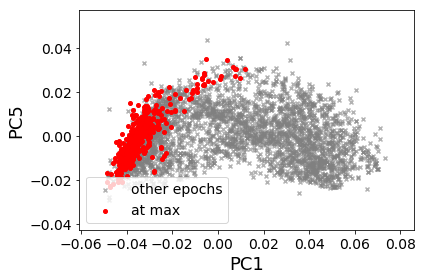

In [11]:
# plot PC1 and PC5
plt.figure()
plt.scatter(matrix[all_spec, 0], matrix[all_spec, 4], color='gray', alpha=0.6, marker='x', s=16, label='other epochs')
plt.scatter(matrix[at_max,0], matrix[at_max,4], color='red', marker='o', s=16, label='at max')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC5', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='lower left')
plt.tight_layout()
plt.savefig('transfer_learning_scatter.pdf', format='pdf', dpi=1000)
plt.show()